In [1]:
import os

os.chdir("../../")

import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_handling import ingestion

sns.set_theme(context="paper", font_scale=2.0, style="whitegrid")

In [2]:
ts_data = ingestion.read_combined().dropna()

X = ts_data.drop(columns=["consumption", "temperature"])
y = ts_data["consumption"]

# Add constant
X = sm.add_constant(X)

# Fit and summarize OLS model
model = sm.OLS(y, X)
results = model.fit()

d:\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     5902.
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        10:42:35   Log-Likelihood:                -31165.
No. Observations:                2250   AIC:                         6.235e+04
Df Residuals:                    2242   BIC:                         6.239e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.467e+06   3.15e+04    141.835      0.000    4.41e+06    4.53e+06
temperature_capped -1.657e+05    843.143   -196.469      0.000   -1.67e+05   -1.64e+05
imbalance_prices   -5117.6421    349.491    -14.643      0.000   -5803.003   -4432.282
electricity_price   2058.1201    174.206     11.814      0.000    1716.498    2399.742
crude_oil_price     -390.4529    422.863     -0.923      0.356   -1219.698     438.792
eua_price            389.9971    313.562      1.244      0.214    -224.904    1004.898
storage_levels      -427.7787     96.693     -4.424      0.000    -617.396    -238.161
weekend            -2.853e+05   1.22e+04    -23.387      0.000   -3.09e+05   -2.61e+05
==============================================================================
Omnibus:                       72.287   Durbin-Watson:                   0.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.921
Skew:                          -0.438   Prob(JB):                     7.29e-18
Kurtosis:                       3.273   Cond. No.                     1.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

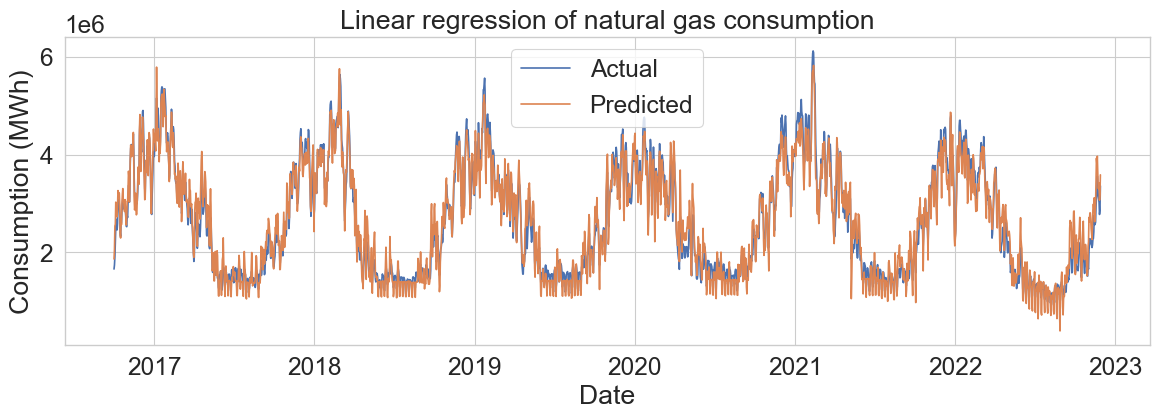

In [4]:
# Plot linear regression
regression_y = results.predict(X)

# Plot
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y, label="Actual")
ax.plot(regression_y, label="Predicted")

ax.set_xlabel("Date")
ax.set_ylabel("Consumption (MWh)")
ax.legend()
ax.set_title("Linear regression of natural gas consumption")

# Save plot
fig.savefig("diagrams/modelling_001_001.svg", format="svg", bbox_inches="tight")

### Train and test set

In [5]:
X = ts_data.drop(columns=["consumption", "temperature"])
y = ts_data["consumption"]

# Add constant
X = sm.add_constant(X)

# Fit and summarize OLS model
model = sm.OLS(y[:"2020"], X[:"2020"])
results = model.fit()

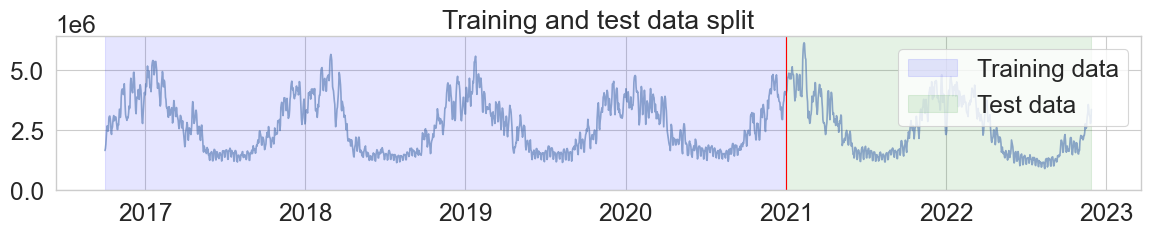

In [6]:
fig, ax = plt.subplots(figsize=(14, 2))
ax.plot(y, alpha=0.6)

ax.axvspan(
    y.index.min(), pd.Timestamp("2020-12-31"), color="blue", alpha=0.1, label="Training data"
)
ax.axvspan(
    pd.Timestamp("2020-12-31"), y.index.max(), color="green", alpha=0.1, label="Test data"
)

ax.axvline(
    pd.Timestamp("2020-12-31"), color="red", linewidth=0.8
)

ax.set_ylim(0)
ax.legend()
ax.set_title("Training and test data split")

# Save plot
fig.savefig("diagrams/modelling_001_002.svg", format="svg", bbox_inches="tight")

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     4740.
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        10:42:40   Log-Likelihood:                -21358.
No. Observations:                1553   AIC:                         4.273e+04
Df Residuals:                    1545   BIC:                         4.277e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.055e+06   3.95e+04    102.738      0.000    3.98e+06    4.13e+06
temperature_capped -1.607e+05    982.855   -163.536      0.000   -1.63e+05   -1.59e+05
imbalance_prices    -736.6321    843.917     -0.873      0.383   -2391.976     918.712
electricity_price   6500.2900    487.657     13.330      0.000    5543.751    7456.829
crude_oil_price    -1150.6938    537.472     -2.141      0.032   -2204.945     -96.443
eua_price           4235.8974    743.006      5.701      0.000    2778.490    5693.304
storage_levels        97.2571    111.630      0.871      0.384    -121.705     316.219
weekend            -2.434e+05   1.39e+04    -17.531      0.000   -2.71e+05   -2.16e+05
==============================================================================
Omnibus:                       51.173   Durbin-Watson:                   0.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.634
Skew:                          -0.443   Prob(JB):                     8.30e-13
Kurtosis:                       3.272   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
X_static_regressors = X.copy()
X_static_regressors.loc["2021-01-01":, X_static_regressors.columns.drop("temperature_capped")] = float("nan")
X_static_regressors = X_static_regressors.fillna(method="ffill")

In [9]:
modelled_consumption = results.predict(X)
modelled_consumption_static_regressors = results.predict(X_static_regressors)

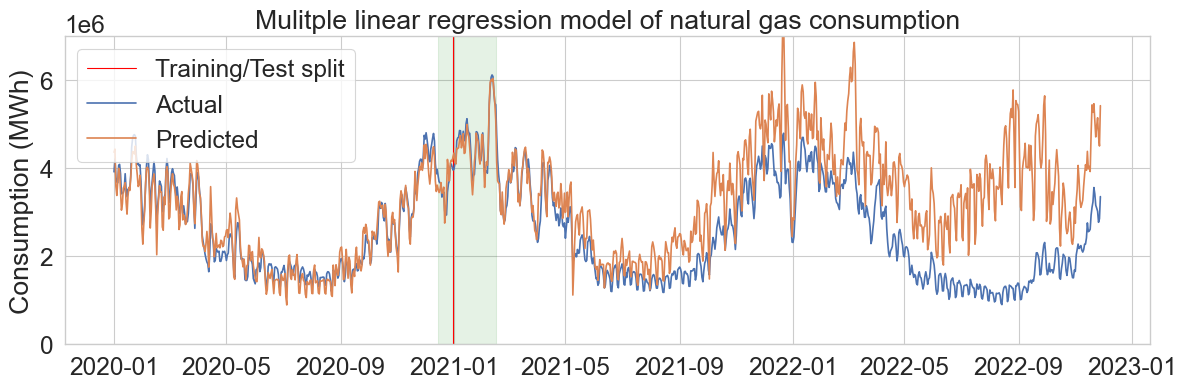

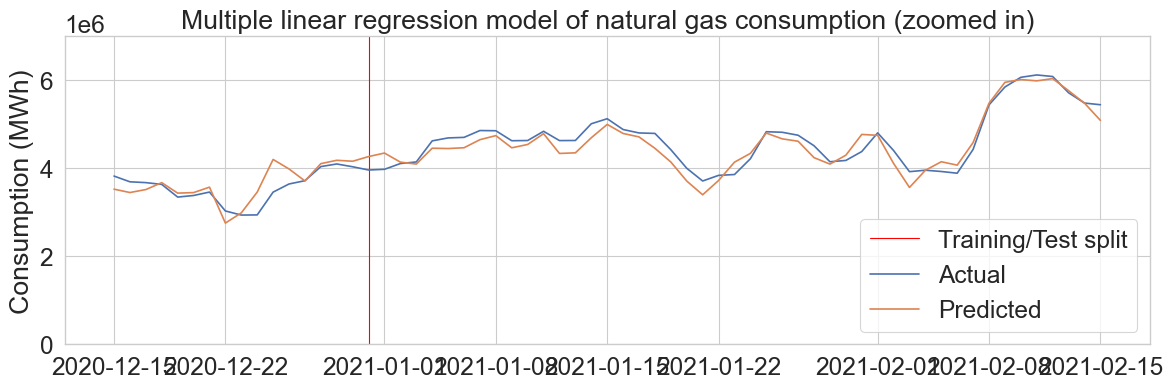

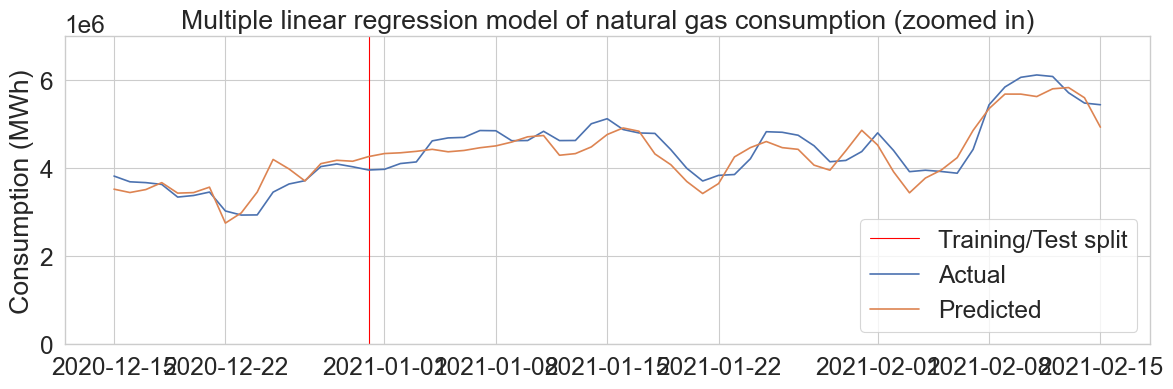

In [16]:
# Plot 1 - multiple years
fig, ax = plt.subplots(figsize=(14, 4))

ax.axvline(
    pd.Timestamp("2020-12-31"), color="red", linewidth=0.8, label="Training/Test split"
)
ax.axvspan(
    pd.Timestamp("2020-12-15"), pd.Timestamp("2021-02-15"), color="green", alpha=0.1
)
ax.plot(y["2020":], label="Actual")
ax.plot(modelled_consumption["2020":], label="Predicted")
ax.set_ylabel("Consumption (MWh)")
ax.legend()
ax.set_title("Mulitple linear regression model of natural gas consumption")
ax.set_ylim(0, 7 * 10**6)

# Save plot
fig.savefig("diagrams/modelling_001_003.svg", format="svg", bbox_inches="tight")

# Plot 2 - zoomed in
fig, ax2 = plt.subplots(figsize=(14, 4))

ax2.axvline(
    pd.Timestamp("2020-12-31"), color="red", linewidth=0.8, label="Training/Test split"
)
ax2.plot(y["2020-12-15":"2021-02-15"], label="Actual")
ax2.plot(modelled_consumption["2020-12-15":"2021-02-15"], label="Predicted")
ax2.set_ylabel("Consumption (MWh)")
ax2.legend()
ax2.set_title("Multiple linear regression model of natural gas consumption (zoomed in)")
ax2.set_ylim(0, 7 * 10**6)

# Save plot
fig.savefig("diagrams/modelling_001_004.svg", format="svg", bbox_inches="tight")


# Plot 3 - zoomed in with static regressors
fig, ax3 = plt.subplots(figsize=(14, 4))

ax3.axvline(
    pd.Timestamp("2020-12-31"), color="red", linewidth=0.8, label="Training/Test split"
)
ax3.plot(y["2020-12-15":"2021-02-15"], label="Actual")
ax3.plot(
    modelled_consumption_static_regressors["2020-12-15":"2021-02-15"], label="Predicted"
)
ax3.set_ylabel("Consumption (MWh)")
ax3.legend()
ax3.set_title(
    "Multiple linear regression model of natural gas consumption (zoomed in)"
)
ax3.set_ylim(0, 7 * 10**6)

# Save plot
fig.savefig("diagrams/modelling_001_005.svg", format="svg", bbox_inches="tight")

Result: 2022 lower consumption of natural gas not captured by regressors

In [11]:
# Mean Absolute Percentage Error (MAPE) for 60days after training data cutoff
mape = (
    abs(y["2021-01-01":"2021-02-28"] - modelled_consumption["2021-01-01":"2021-02-28"])
    / y["2021-01-01":"2021-02-28"]
).mean() * 100

mape_static_regressors = (
    abs(y["2021-01-01":"2021-02-28"] - modelled_consumption_static_regressors["2021-01-01":"2021-02-28"])
    / y["2021-01-01":"2021-02-28"]
).mean() * 100

mape_static_regressors_14days = (
    abs(y["2021-01-01":"2021-01-14"] - modelled_consumption_static_regressors["2021-01-01":"2021-01-14"])
    / y["2021-01-01":"2021-01-14"]
).mean() * 100

print(f"MAPE: {mape:.2f}%")
print(f"MAPE (static regressors): {mape_static_regressors:.2f}%")
print(f"MAPE (static regressors, 14 days): {mape_static_regressors_14days:.2f}%")

MAPE: 4.42%
MAPE (static regressors): 6.73%
MAPE (static regressors, 14 days): 5.83%
